In [2]:

import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np
import matplotlib.pyplot as plt


In [3]:

(train_images_all, train_labels_all), (test_images_all, test_labels_all) = datasets.cifar10.load_data()


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
ID_PESAWAT = 0
ID_MOBIL = 1


In [4]:


def filter_classes(images, labels, class_ids_to_keep):
    """Fungsi untuk memfilter gambar dan label berdasarkan ID kelas."""
    
    mask = np.isin(labels, class_ids_to_keep).flatten()


    filtered_images = images[mask]
    filtered_labels = labels[mask]

   
    label_map = {old_id: new_id for new_id, old_id in enumerate(class_ids_to_keep)}
    new_labels = np.array([label_map[l[0]] for l in filtered_labels])

    return filtered_images, new_labels.reshape(-1, 1)


In [5]:
(train_images, train_labels) = filter_classes(train_images_all, train_labels_all, [ID_PESAWAT, ID_MOBIL])
(test_images, test_labels) = filter_classes(test_images_all, test_labels_all, [ID_PESAWAT, ID_MOBIL])

print("Proses filtering selesai.")
print(f"Jumlah gambar latih: {len(train_images)}")
print(f"Jumlah gambar uji: {len(test_images)}")






Proses filtering selesai.
Jumlah gambar latih: 10000
Jumlah gambar uji: 2000


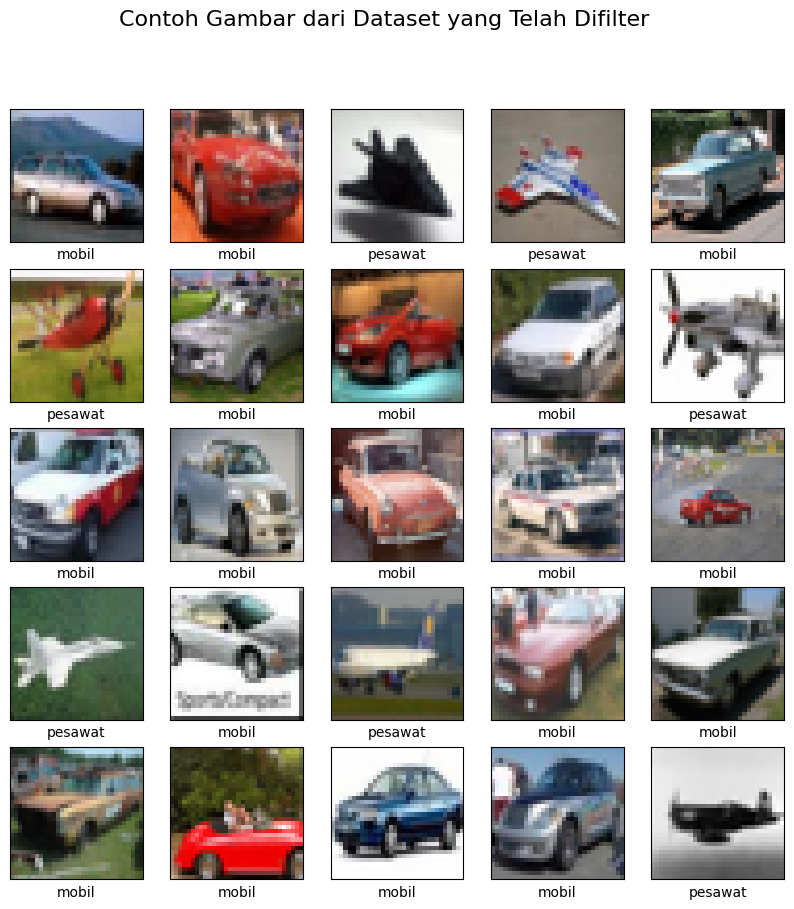

In [6]:
train_images, test_images = train_images / 255.0, test_images / 255.0

new_class_names = ['pesawat', 'mobil']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(new_class_names[train_labels[i][0]])
plt.suptitle("Contoh Gambar dari Dataset yang Telah Difilter", fontsize=16)
plt.show()



In [7]:
model = models.Sequential([    # Lapisan Konvolusi pertama
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

c:\Users\noriz\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,985 (476.50 KB)

 Trainable params: 121,985 (476.50 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


print("\nMemulai proses pelatihan model...")
history = model.fit(train_images, train_labels,
                    epochs=5, 
                    validation_data=(test_images, test_labels),
                    verbose=1)
print("Pelatihan model selesai.")




Memulai proses pelatihan model...
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7432 - loss: 0.4881 - val_accuracy: 0.8810 - val_loss: 0.2919
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8997 - loss: 0.2555 - val_accuracy: 0.9255 - val_loss: 0.1906
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9255 - loss: 0.1900 - val_accuracy: 0.9305 - val_loss: 0.1803
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9419 - loss: 0.1483 - val_accuracy: 0.9445 - val_loss: 0.1385
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9553 - loss: 0.1149 - val_accuracy: 0.9435 - val_loss: 0.1339
Pelatihan model selesai.


In [9]:
print("\nMengevaluasi model pada data uji...")
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\n==============================================")
print(f"Akurasi Model pada Data Uji: {test_acc*100:.2f}%")
print(f"==============================================")




Mengevaluasi model pada data uji...
63/63 - 0s - 4ms/step - accuracy: 0.9435 - loss: 0.1339

Akurasi Model pada Data Uji: 94.35%


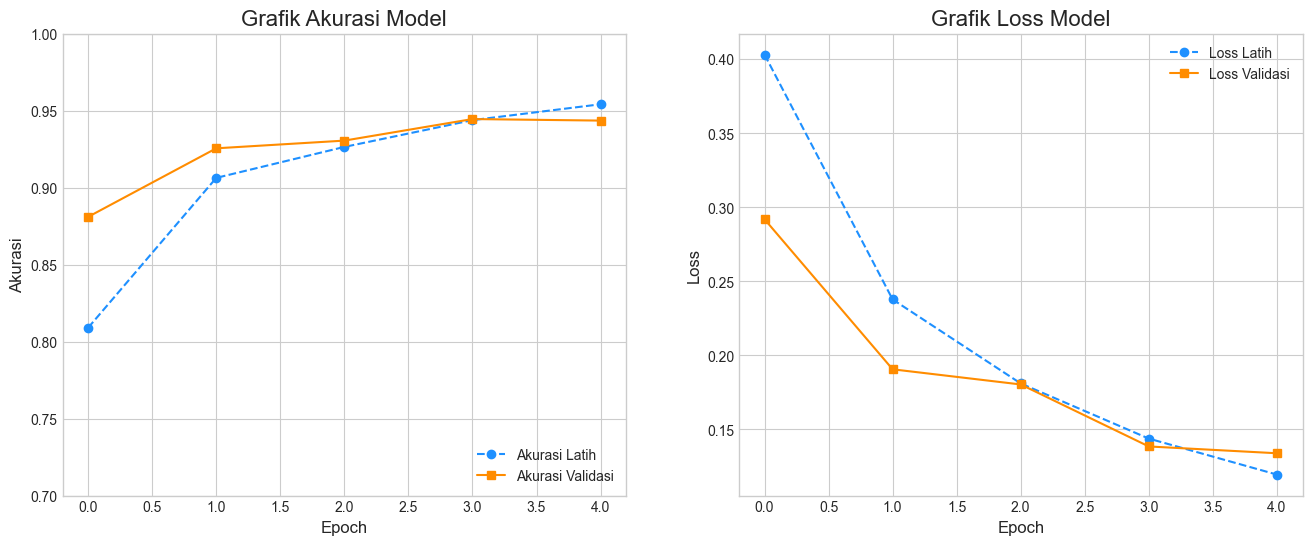

In [11]:

plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(history.history['accuracy'], label='Akurasi Latih', color='dodgerblue', marker='o', linestyle='--')
ax1.plot(history.history['val_accuracy'], label='Akurasi Validasi', color='darkorange', marker='s')
ax1.set_title('Grafik Akurasi Model', fontsize=16)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Akurasi', fontsize=12)
ax1.legend(loc='lower right')
ax1.set_ylim([0.7, 1])


ax2.plot(history.history['loss'], label='Loss Latih', color='dodgerblue', marker='o', linestyle='--')
ax2.plot(history.history['val_loss'], label='Loss Validasi', color='darkorange', marker='s')
ax2.set_title('Grafik Loss Model', fontsize=16)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(loc='upper right')

plt.show() 